# Checkpoint

In [ ]:
# Geral
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

## Carregar dados

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [ ]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178850,178873,178879,178899,178901,178901,178901,178905,178919,178922
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,275002,275055,275107,275167,275177,275191,275211,275266,275310,275341
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265776,265779,265780,265782,265782,265782,265782,265786,265791,265794
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,41349,41349,41349,41349,41349,41349,41717,41717,41717,41717
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,657060,657060,657060,657060,657060,657060,657060,657060,657060,657060
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11818,11818,11818,11818,11819,11819,11819,11819,11819,11819
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,319594,319594,319594,319733,319755,319755,319755,319755,319755,320099


## Ajustes



- Nomes das colunas

In [ ]:
dados_paises_covid.rename(columns={"Province/State": "province", 
                                   "Country/Region": "country"}, 
                          inplace=True)

In [ ]:
dados_paises_covid_dead.rename(columns={"Province/State": "province", 
                                        "Country/Region": "country"}, 
                               inplace=True)

In [ ]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/28/22', '4/29/22', '4/30/22', '5/1/22', '5/2/22', '5/3/22', '5/4/22',
       '5/5/22', '5/6/22', '5/7/22'],
      dtype='object', length=841)

- Reajustar dados

In [ ]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                             var_name = 'date', 
                                             value_name = 'infected')

In [ ]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                                       var_name = 'date', 
                                                       value_name = 'dead')

In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
237703,NaN,West Bank and Gaza,31.952200,35.233200,5/7/22,5657
237704,NaN,Winter Olympics 2022,39.904200,116.407400,5/7/22,0
237705,NaN,Yemen,15.552727,48.516388,5/7/22,2149
237706,NaN,Zambia,-13.133897,27.849332,5/7/22,3982
237707,NaN,Zimbabwe,-19.015438,29.154857,5/7/22,5473


In [ ]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [ ]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'], 
                                            infer_datetime_format='True')

In [ ]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'], 
                                                 infer_datetime_format='True')

In [ ]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
237703,NaN,West Bank and Gaza,31.952200,35.233200,2022-05-07,657060
237704,NaN,Winter Olympics 2022,39.904200,116.407400,2022-05-07,535
237705,NaN,Yemen,15.552727,48.516388,2022-05-07,11819
237706,NaN,Zambia,-13.133897,27.849332,2022-05-07,320099
237707,NaN,Zimbabwe,-19.015438,29.154857,2022-05-07,248214


In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
237703,NaN,West Bank and Gaza,31.952200,35.233200,2022-05-07,5657
237704,NaN,Winter Olympics 2022,39.904200,116.407400,2022-05-07,0
237705,NaN,Yemen,15.552727,48.516388,2022-05-07,2149
237706,NaN,Zambia,-13.133897,27.849332,2022-05-07,3982
237707,NaN,Zimbabwe,-19.015438,29.154857,2022-05-07,5473


In [ ]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [ ]:
dados_paises_covid.shape

(237708, 6)

In [ ]:
dados_paises_covid_dead.shape

(237708, 6)

In [ ]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead, 
                       on = ['province', 'country',	'Lat',	'Long',	'date'], 
                       how = 'inner')

In [ ]:
dados_covid.tail()

,province,country,Lat,Long,date,infected,dead
237703,NaN,West Bank and Gaza,31.952200,35.233200,2022-05-07,657060,5657
237704,NaN,Winter Olympics 2022,39.904200,116.407400,2022-05-07,535,0
237705,NaN,Yemen,15.552727,48.516388,2022-05-07,11819,2149
237706,NaN,Zambia,-13.133897,27.849332,2022-05-07,320099,3982
237707,NaN,Zimbabwe,-19.015438,29.154857,2022-05-07,248214,5473


In [ ]:
dados_covid.shape

(237708, 7)

## Aqui começa o trabalho

## *Exemplo probabilidades (memórias de cálculo)

- Prob(infectados covid)

total infectados = soma do total de infectados dos 4 países

total_populacao = soma do total de população dos 4 países

P(infectados) = total infectados / total_populacao



- P(infectado covid e ser Brasileiro)

infectado_e_brasil = total de infectados do Brasil

P(infectado covid e ser Brasileiro) = infectado_e_brasil / total_populacao

- P(Infectado covid | ser Brasileiro)

total_brasil_populacao = populacao do Brasil

P(Infectado covid | ser Brasileiro) = (infectado_e_brasil / total_populacao) / (total_brasil_populacao / total_populacao)

ou

P(Infectado covid | ser Brasileiro) = infectado_e_brasil / total_brasil_populacao

# Primeiros Passos 

- 1 –Filtrar  a  data  mais  recente  (realizar  o  processo  para  buscar  a  última  data  de  forma automatizada) e os países Brasil, Itália,E.U.Ae Canadá.

- 2 –Pesquisar populações de Brasil, Itália, E.U.A. e Canadá. Depois, adicionar estas populações como uma coluna no dataset.

In [ ]:
paises_selecionados = ['Brazil', 'Italy', 'US', 'Canada']

In [ ]:
data_min = np.max(dados_covid['date'])-timedelta(days=365)

In [ ]:
data_max = np.max(dados_covid['date'])

## Dataset 2021





In [ ]:
df_min = dados_covid[(dados_covid['country'].isin(paises_selecionados)) & \
                (dados_covid['date'] == data_min)]

In [ ]:
df_min

,province,country,Lat,Long,date,infected,dead
133795,NaN,Brazil,-14.23500,-51.92530,2021-05-07,15096714,419633
133804,Alberta,Canada,53.93330,-116.57650,2021-05-07,205115,2106
133805,British Columbia,Canada,53.72670,-127.64760,2021-05-07,134341,1602
133806,Diamond Princess,Canada,0.00000,0.00000,2021-05-07,0,1
133807,Grand Princess,Canada,0.00000,0.00000,2021-05-07,13,0
133808,Manitoba,Canada,53.76090,-98.81390,2021-05-07,40940,987
133809,New Brunswick,Canada,46.56530,-66.46190,2021-05-07,1988,40
133810,Newfoundland and Labrador,Canada,53.13550,-57.66040,2021-05-07,1127,6
133811,Northwest Territories,Canada,64.82550,-124.84570,2021-05-07,105,0
133812,Nova Scotia,Canada,44.68200,-63.74430,2021-05-07,3591,70


In [ ]:
df_min.drop(df_min.loc[df_min['province'] =='Diamond Princess'].index, inplace=True)
df_min.drop(df_min.loc[df_min['province'] =='Grand Princess'].index, inplace=True)
df_min.drop(df_min.loc[df_min['province'] =='Repatriated Travellers'].index, inplace=True)

In [ ]:
df_min

,province,country,Lat,Long,date,infected,dead
133795,NaN,Brazil,-14.23500,-51.92530,2021-05-07,15096714,419633
133804,Alberta,Canada,53.93330,-116.57650,2021-05-07,205115,2106
133805,British Columbia,Canada,53.72670,-127.64760,2021-05-07,134341,1602
133808,Manitoba,Canada,53.76090,-98.81390,2021-05-07,40940,987
133809,New Brunswick,Canada,46.56530,-66.46190,2021-05-07,1988,40
133810,Newfoundland and Labrador,Canada,53.13550,-57.66040,2021-05-07,1127,6
133811,Northwest Territories,Canada,64.82550,-124.84570,2021-05-07,105,0
133812,Nova Scotia,Canada,44.68200,-63.74430,2021-05-07,3591,70
133813,Nunavut,Canada,70.29980,-83.10760,2021-05-07,553,4
133814,Ontario,Canada,51.25380,-85.32320,2021-05-07,495355,9095


In [ ]:
cols = ['country','infected','dead']
df_min = df_min[cols]

In [ ]:
morte = df_min.groupby('country').agg(morte = pd.NamedAgg('dead','sum'))
infectados = df_min.groupby('country').agg(infectados = pd.NamedAgg('infected', 'sum'))

In [ ]:
morte

,morte
country,
Brazil,419633
Canada,25388
Italy,122470
US,576747


In [ ]:
infectados

,infectados
country,
Brazil,15096714
Canada,1283179
Italy,4092747
US,32759388


In [ ]:
dados_covid2 = pd.merge(morte, infectados, 
                       on = ['country'], 
                       how = 'inner')

In [ ]:
dados2021 = dados_covid2.reset_index()
pop = [213000000,37966429, 60548678,332524270]
dados2021['pop'] = pop

In [ ]:
dados2021

,country,morte,infectados,pop
0,Brazil,419633,15096714,213000000
1,Canada,25388,1283179,37966429
2,Italy,122470,4092747,60548678
3,US,576747,32759388,332524270


## Dataset 2022

In [ ]:
df_max = dados_covid[(dados_covid['country'].isin(paises_selecionados)) & \
                (dados_covid['date'] == data_max)]

In [ ]:
df_max

,province,country,Lat,Long,date,infected,dead
237455,NaN,Brazil,-14.23500,-51.92530,2022-05-07,30558530,664361
237464,Alberta,Canada,53.93330,-116.57650,2022-05-07,570806,4321
237465,British Columbia,Canada,53.72670,-127.64760,2022-05-07,365577,3226
237466,Diamond Princess,Canada,0.00000,0.00000,2022-05-07,0,1
237467,Grand Princess,Canada,0.00000,0.00000,2022-05-07,13,0
237468,Manitoba,Canada,53.76090,-98.81390,2022-05-07,141973,1819
237469,New Brunswick,Canada,46.56530,-66.46190,2022-05-07,62148,399
237470,Newfoundland and Labrador,Canada,53.13550,-57.66040,2022-05-07,44529,168
237471,Northwest Territories,Canada,64.82550,-124.84570,2022-05-07,11919,22
237472,Nova Scotia,Canada,44.68200,-63.74430,2022-05-07,89262,336


In [ ]:
df_max.drop(df_max.loc[df_max['province'] =='Diamond Princess'].index, inplace=True)
df_max.drop(df_max.loc[df_max['province'] =='Grand Princess'].index, inplace=True)
df_max.drop(df_max.loc[df_max['province'] =='Repatriated Travellers'].index, inplace=True)

In [ ]:
df_max

,province,country,Lat,Long,date,infected,dead
237455,NaN,Brazil,-14.23500,-51.92530,2022-05-07,30558530,664361
237464,Alberta,Canada,53.93330,-116.57650,2022-05-07,570806,4321
237465,British Columbia,Canada,53.72670,-127.64760,2022-05-07,365577,3226
237468,Manitoba,Canada,53.76090,-98.81390,2022-05-07,141973,1819
237469,New Brunswick,Canada,46.56530,-66.46190,2022-05-07,62148,399
237470,Newfoundland and Labrador,Canada,53.13550,-57.66040,2022-05-07,44529,168
237471,Northwest Territories,Canada,64.82550,-124.84570,2022-05-07,11919,22
237472,Nova Scotia,Canada,44.68200,-63.74430,2022-05-07,89262,336
237473,Nunavut,Canada,70.29980,-83.10760,2022-05-07,3531,7
237474,Ontario,Canada,51.25380,-85.32320,2022-05-07,1288468,13007


In [ ]:
cols = ['country','infected','dead']
df_max = df_max[cols]

In [ ]:
morte = df_max.groupby('country').agg(morte = pd.NamedAgg('dead','sum'))
infectados = df_max.groupby('country').agg(infectados = pd.NamedAgg('infected', 'sum'))

In [ ]:
morte

,morte
country,
Brazil,664361
Canada,39816
Italy,164417
US,997503


In [ ]:
infectados

,infectados
country,
Brazil,30558530
Canada,3805890
Italy,16767773
US,81858744


In [ ]:
dados_covid1 = pd.merge(morte, infectados, 
                       on = ['country'], 
                       how = 'inner')

In [ ]:
dados2022 = dados_covid1.reset_index()
pop = [214549952,38491976,60605772,335028178]
dados2022['pop'] = pop

In [ ]:
dados2022

,country,morte,infectados,pop
0,Brazil,664361,30558530,214549952
1,Canada,39816,3805890,38491976
2,Italy,164417,16767773,60605772
3,US,997503,81858744,335028178


# 3 - Considerando   somente   os   dados   dos   países   apresentados,   encontre   as   seguintes probabilidades, baseando-se na coluna de infectados:

## Resolução primeira parte (Brasil)



- a)P(infectado covid):

In [ ]:
dados2022

,country,morte,infectados,pop
0,Brazil,664361,30558530,214549952
1,Canada,39816,3805890,38491976
2,Italy,164417,16767773,60605772
3,US,997503,81858744,335028178


In [ ]:
pop_total_atual = sum(dados2022['pop'])
infectados_total = sum(dados2022['infectados'])

In [ ]:
P_infectado = round(float(infectados_total/pop_total_atual)*100,3)
P_infectado

20.502

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado é de 20%

- b)P(infectado covid e ser Brasileiro)

In [ ]:
br = dados2022[dados2022['country']== 'Brazil']
br_infectado = br['infectados']

In [ ]:
p_infectado_e_br = round(float(br_infectado / pop_total_atual)*100,3)
p_infectado_e_br

4.711

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado e brasileiro é de 4.7%

- c)P(infectado covid | ser Brasileiro)

In [ ]:
br_pop = br['pop']

In [ ]:
p_infectado_br = round(float(br_infectado/br_pop)*100,3)
p_infectado_br

14.243

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado sendo brasileiro é de 14.2%

- d)Compare estes resultados com o mesmo período do ano passado.

### Obtendo os dados do ano passado 

- a)P(infectado covid):

In [ ]:
dados2021

,country,morte,infectados,pop
0,Brazil,419633,15096714,213000000
1,Canada,25388,1283179,37966429
2,Italy,122470,4092747,60548678
3,US,576747,32759388,332524270


In [ ]:
pop_total_passado = sum(dados2021['pop'])
infectados_total = sum(dados2021['infectados'])

In [ ]:
P_infectado_2021 = round(float(infectados_total/pop_total_passado)*100,3)
P_infectado_2021

8.265

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado ano passado é de 8%

- b)P(infectado covid e ser Brasileiro)

In [ ]:
br = dados2021[dados2021['country']== 'Brazil']
br_infectado = br['infectados']

In [ ]:
p_infectado_e_br_2021 = round(float(br_infectado / pop_total_passado)*100,3)
p_infectado_e_br_2021

2.344

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado e brasileiro no ano passado é de 2%

- c)P(infectado covid | ser Brasileiro)

In [ ]:
br_pop = br['pop']

In [ ]:
p_infectado_br_2021 = round(float(br_infectado/br_pop)*100,3)
p_infectado_br_2021

7.088

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado sendo brasileiro é de 7%

### Gerando a comparação

In [ ]:
colunas = {'p_infectado' : [P_infectado_2021,P_infectado], 
           'p_infectado_e_br' : [p_infectado_e_br_2021,p_infectado_e_br], 
           'p_infectado|br':[p_infectado_br_2021,p_infectado_br],
           'ano' : ['Passado', 'Atual']
           }

In [ ]:
df1 = pd.DataFrame(colunas)

In [ ]:
df1

,p_infectado,p_infectado_e_br,p_infectado|br,ano
0,8.265,2.344,7.088,Passado
1,20.502,4.711,14.243,Atual


Text(0.5, 1.0, 'Comparação da probabilidade de infectado por covid')

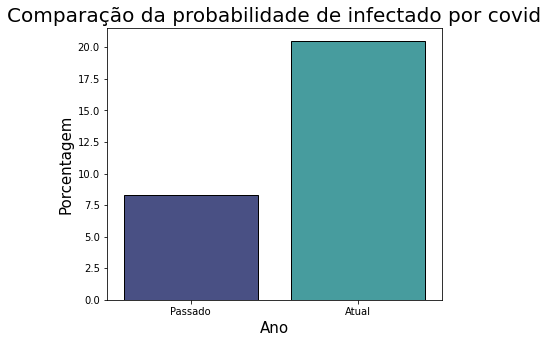

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_infectado', data = df1, edgecolor='black',palette = 'mako')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de infectado por covid', fontsize = 20)

Text(0.5, 1.0, 'Comparação da probabilidade de infectado por covid e br')

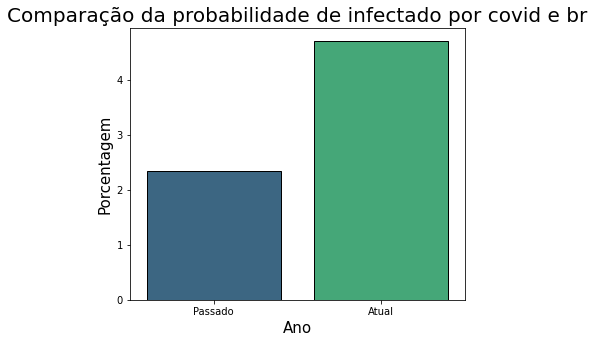

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_infectado_e_br', data = df1, edgecolor='black',palette = 'viridis')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de infectado por covid e br', fontsize = 20)

Text(0.5, 1.0, 'Comparação da probabilidade de infectado por covid|br')

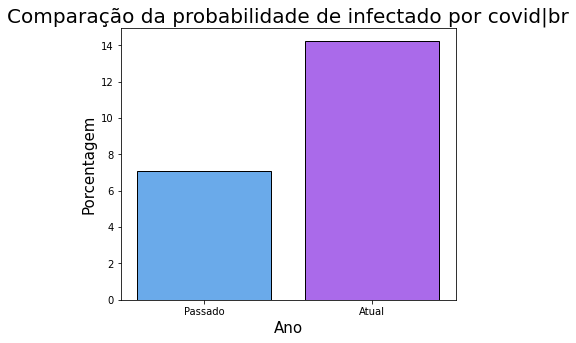

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_infectado|br', data = df1, edgecolor='black',palette = 'cool')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de infectado por covid|br', fontsize = 20)

## Resolução segunda parte (Estados Unidos)


- e)P(infectado covid e ser USA)

In [ ]:
dados2022

,country,morte,infectados,pop
0,Brazil,664361,30558530,214549952
1,Canada,39816,3805890,38491976
2,Italy,164417,16767773,60605772
3,US,997503,81858744,335028178


In [ ]:
us = dados2022[dados2022['country']== 'US']
us_infectado = us['infectados']

In [ ]:
p_infectado_e_us = round(float(us_infectado / pop_total_atual)*100,3)
p_infectado_e_us

12.619

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado e americano é de 12.6%

- f)P(infectado covid | ser USA)



In [ ]:
us_pop = us['pop']

In [ ]:
p_infectado_us = round(float(us_infectado/us_pop)*100,3)
p_infectado_us 

24.433

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado sendo americano é de 24.4%

- g)Compare estes resultados com o mesmo período do ano passado.

### Obtendo os dados do ano passado 

In [ ]:
dados2021

,country,morte,infectados,pop
0,Brazil,419633,15096714,213000000
1,Canada,25388,1283179,37966429
2,Italy,122470,4092747,60548678
3,US,576747,32759388,332524270


- e)P(infectado covid e ser USA)

In [ ]:
us = dados2021[dados2021['country']== 'US']
us_infectado = us['infectados']

In [ ]:
p_infectado_e_us_2021 = round(float(us_infectado / pop_total_passado)*100,3)
p_infectado_e_us_2021

5.087

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado e americano no ano passado é de 5%

- f)P(infectado covid | ser USA)

In [ ]:
us_pop = us['pop']

In [ ]:
p_infectado_us_2021 = round(float(us_infectado/us_pop)*100,3)
p_infectado_us_2021

9.852

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado sendo brasileiro é de 9.8%

### Gerando a comparação

In [ ]:
colunas = {
           'p_infectado_e_USA' : [p_infectado_e_us_2021,p_infectado_e_us], 
           'p_infectado|USA':[p_infectado_us_2021,p_infectado_us],
           'ano' : ['Passado', 'Atual']
           }

In [ ]:
df2 = pd.DataFrame(colunas)

In [ ]:
df2

,p_infectado_e_USA,p_infectado|USA,ano
0,5.087,9.852,Passado
1,12.619,24.433,Atual


Text(0.5, 1.0, 'Comparação da probabilidade de infectado por covid e USA')

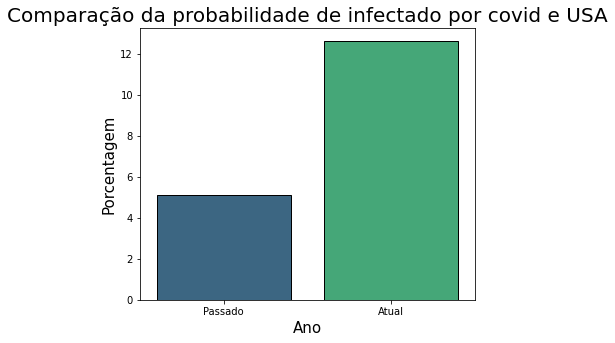

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_infectado_e_USA', data = df2, edgecolor='black',palette = 'viridis')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de infectado por covid e USA', fontsize = 20)

Text(0.5, 1.0, 'Comparação da probabilidade de infectado por covid|USA')

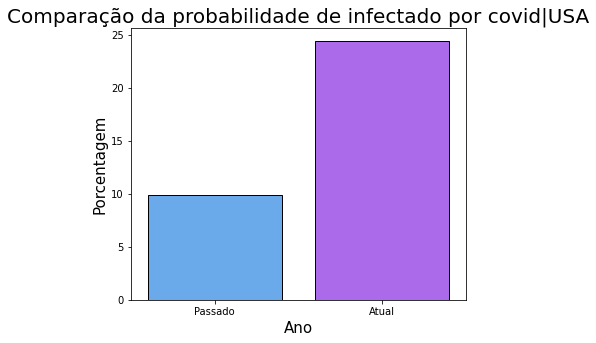

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_infectado|USA', data = df2, edgecolor='black',palette = 'cool')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de infectado por covid|USA', fontsize = 20)

## Resolução terceira parte (Italia)


- h)P(infectado covid e ser Italiano)

In [ ]:
dados2022

,country,morte,infectados,pop
0,Brazil,664361,30558530,214549952
1,Canada,39816,3805890,38491976
2,Italy,164417,16767773,60605772
3,US,997503,81858744,335028178


In [ ]:
it = dados2022[dados2022['country']== 'Italy']
it_infectado = it['infectados']

In [ ]:
p_infectado_e_it = round(float(it_infectado / pop_total_atual)*100,3)
p_infectado_e_it

2.585

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado e italiano é de 2.6%

- i)P(infectado covid | ser Italiano)


In [ ]:
it_pop = it['pop']

In [ ]:
p_infectado_it = round(float(it_infectado/it_pop)*100,3)
p_infectado_it

27.667

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado sendo italiano é de 27%

- j)Compare estes resultados com o mesmo período do ano passado.

### Obtendo os dados do ano passado 

In [ ]:
dados2021

,country,morte,infectados,pop
0,Brazil,419633,15096714,213000000
1,Canada,25388,1283179,37966429
2,Italy,122470,4092747,60548678
3,US,576747,32759388,332524270


- h)P(infectado covid e ser Italiano)

In [ ]:
it = dados2021[dados2021['country']== 'Italy']
it_infectado = it['infectados']

In [ ]:
p_infectado_e_it_2021 = round(float(it_infectado / pop_total_passado)*100,3)
p_infectado_e_it_2021

0.635

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado e italiano no ano passado é de 0.6%

- i)P(infectado covid | ser Italiano)

In [ ]:
it_pop = it['pop']

In [ ]:
p_infectado_it_2021 = round(float(it_infectado/it_pop)*100,3)
p_infectado_it_2021

6.759

-- Com base nessa analise podemos afirmar que a probabilidade de ser infectado sendo italiano é de 6.7%

### Gerando a comparação

In [ ]:
colunas = {
           'p_infectado_e_Italiano' : [p_infectado_e_it_2021,p_infectado_e_it], 
           'p_infectado|Italiano':[p_infectado_it_2021,p_infectado_it],
           'ano' : ['Passado', 'Atual']
           }

In [ ]:
df3 = pd.DataFrame(colunas)

In [ ]:
df3

,p_infectado_e_Italiano,p_infectado|Italiano,ano
0,0.635,6.759,Passado
1,2.585,27.667,Atual


Text(0.5, 1.0, 'Comparação da probabilidade de infectado por covid e Italiano')

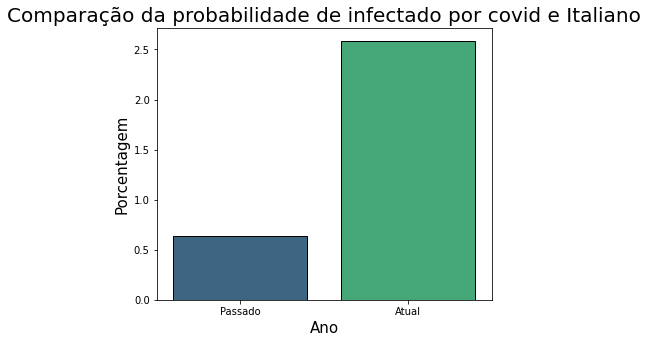

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_infectado_e_Italiano', data = df3, edgecolor='black',palette = 'viridis')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de infectado por covid e Italiano', fontsize = 20)

Text(0.5, 1.0, 'Comparação da probabilidade de infectado por covid|Italiano')

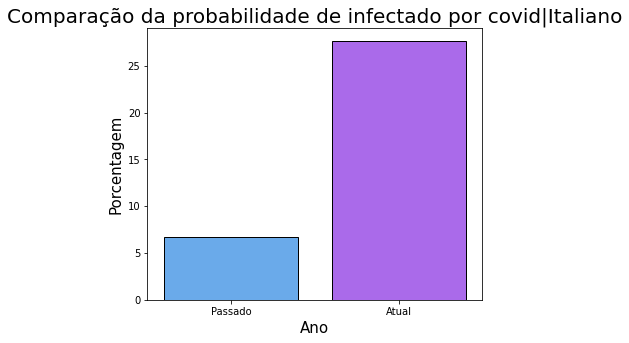

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_infectado|Italiano', data = df3, edgecolor='black',palette = 'cool')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de infectado por covid|Italiano', fontsize = 20)

# 4 –Encontre as seguintes probabilidades, baseando-se na colunade mortos:


## Resolução primeira parte (Brasil)



- a)P(mortecovid):

In [ ]:
dados2022

,country,morte,infectados,pop
0,Brazil,664361,30558530,214549952
1,Canada,39816,3805890,38491976
2,Italy,164417,16767773,60605772
3,US,997503,81858744,335028178


In [ ]:
morte_total_atual = sum(dados2022['morte'])

In [ ]:
P_morte = round(float(morte_total_atual/pop_total_atual)*100,3)
P_morte

0.288

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto por covid é de aproximadamente 0.3%

- b)P(morte covid e ser Brasileiro)

In [ ]:
br = dados2022[dados2022['country']== 'Brazil']
br_morte = br['morte']

In [ ]:
p_morte_e_br = round(float(br_morte / pop_total_atual)*100,3)
p_morte_e_br

0.102

-- Com base nessa analise podemos afirmar que a probabilidade de morrer e ser brasileiro é de 0.1%

- c)P(morte covid | ser Brasileiro)

In [ ]:
br_pop = br['pop']

In [ ]:
p_morte_br = round(float(br_morte/br_pop)*100,3)
p_morte_br

0.31

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto sendo brasileiro é de 0.3%

- d)Compare estes resultados com o mesmo período do ano passado.

### Obtendo os dados do ano passado 

- a)P(mortecovid):

In [ ]:
dados2021

,country,morte,infectados,pop
0,Brazil,419633,15096714,213000000
1,Canada,25388,1283179,37966429
2,Italy,122470,4092747,60548678
3,US,576747,32759388,332524270


In [ ]:
morte_total_passado = sum(dados2021['morte'])

In [ ]:
P_morte_2021 = round(float(morte_total_passado/pop_total_passado)*100,3)
P_morte_2021

0.178

-- Com base nessa analise podemos afirmar que a probabilidade de morte no ano passado é de 0.17%

- b)P(morte e ser Brasileiro)

In [ ]:
br = dados2021[dados2021['country']== 'Brazil']
br_morte = br['morte']

In [ ]:
p_morte_e_br_2021 = round(float(br_morte / pop_total_passado)*100,3)
p_morte_e_br_2021

0.065

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto e brasileiro no ano passado é de 0.06%

- c)P(morte covid | ser Brasileiro)

In [ ]:
br_pop = br['pop']

In [ ]:
p_morte_br_2021 = round(float(br_morte/br_pop)*100,3)
p_morte_br_2021

0.197

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto sendo brasileiro é de 0.2%

### Gerando a comparação

In [ ]:
colunas = {'p_morte' : [P_morte_2021,P_morte], 
           'p_morte_e_br' : [p_morte_e_br_2021,p_morte_e_br], 
           'p_morte|br':[p_morte_br_2021,p_morte_br],
           'ano' : ['Passado', 'Atual']
           }

In [ ]:
df4 = pd.DataFrame(colunas)

In [ ]:
df4

,p_morte,p_morte_e_br,p_morte|br,ano
0,0.178,0.065,0.197,Passado
1,0.288,0.102,0.310,Atual


Text(0.5, 1.0, 'Comparação da probabilidade de morte por covid')

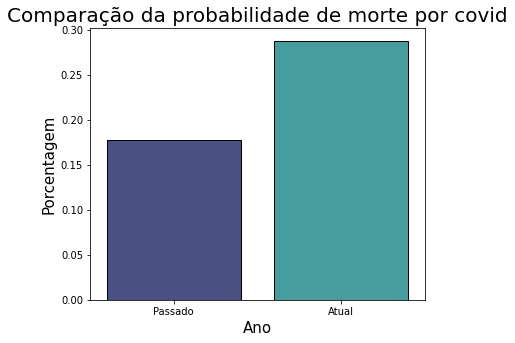

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_morte', data = df4, edgecolor='black',palette = 'mako')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de morte por covid', fontsize = 20)

Text(0.5, 1.0, 'Comparação da probabilidade de morte por covid e br')

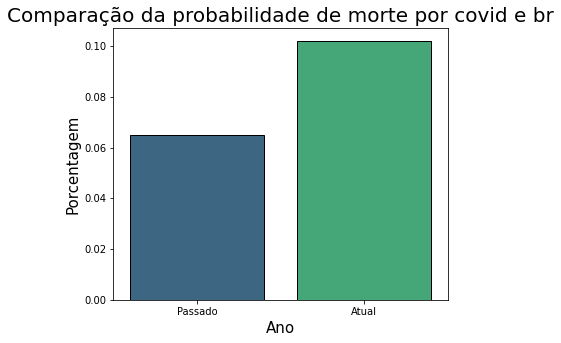

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_morte_e_br', data = df4, edgecolor='black',palette = 'viridis')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de morte por covid e br', fontsize = 20)

Text(0.5, 1.0, 'Comparação da probabilidade de morte por covid|br')

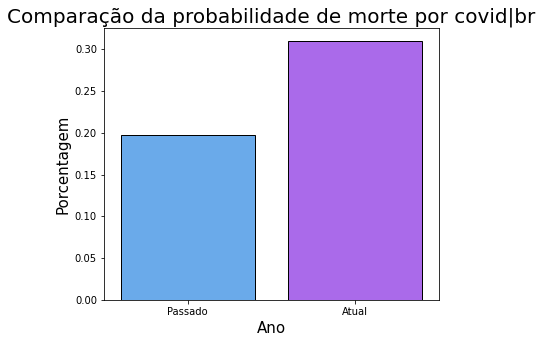

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_morte|br', data = df4, edgecolor='black',palette = 'cool')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de morte por covid|br', fontsize = 20)

## Resolução segunda parte (Estados Unidos)

In [ ]:
dados2022

,country,morte,infectados,pop
0,Brazil,664361,30558530,214549952
1,Canada,39816,3805890,38491976
2,Italy,164417,16767773,60605772
3,US,997503,81858744,335028178




- e)P(mortecovid e ser USA)

In [ ]:
us = dados2022[dados2022['country']== 'US']
us_morte = us['morte']

In [ ]:
p_morte_e_us = round(float(us_morte / pop_total_atual)*100,3)
p_morte_e_us

0.154

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto e americano é de 0.154%

- f)P(mortecovid | ser USA)

In [ ]:
us_pop = us['pop']

In [ ]:
p_morte_us = round(float(us_morte/us_pop)*100,3)
p_morte_us

0.298

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto sendo americano é de aproximadamente 0.3%

- g)Compare estes resultados com o mesmo período do ano passado.

### Obtendo os dados do ano passado 

- e)P(mortecovid e ser USA)

In [ ]:
us = dados2021[dados2021['country']== 'US']
us_morte = us['morte']

In [ ]:
p_morte_e_us_2021 = round(float(us_morte / pop_total_passado)*100,3)
p_morte_e_us_2021

0.09

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto e americano no ano passado é de 0.09%

- f)P(mortecovid | ser USA)

In [ ]:
us_pop = us['pop']

In [ ]:
p_morte_us_2021 = round(float(us_morte/us_pop)*100,3)
p_morte_us_2021

0.173

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto sendo americano é de 0.17%

### Gerando a comparação

In [ ]:
colunas = {
           'p_morte_e_us' : [p_morte_e_us_2021,p_morte_e_us], 
           'p_morte|us':[p_morte_us_2021,p_morte_us],
           'ano' : ['Passado', 'Atual']
           }

In [ ]:
df5 = pd.DataFrame(colunas)

In [ ]:
df5

,p_morte_e_us,p_morte|us,ano
0,0.090,0.173,Passado
1,0.154,0.298,Atual


Text(0.5, 1.0, 'Comparação da probabilidade de morte por covid e EUA')

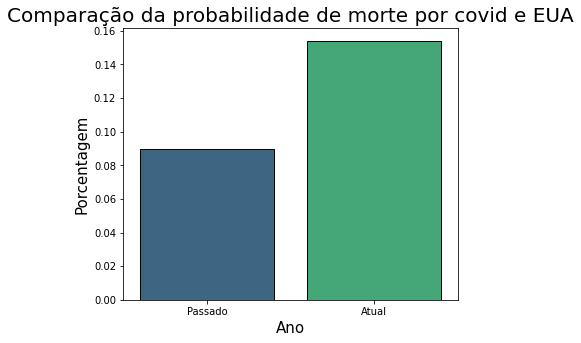

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_morte_e_us', data = df5, edgecolor='black',palette = 'viridis')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de morte por covid e EUA', fontsize = 20)

Text(0.5, 1.0, 'Comparação da probabilidade de morte por covid|EUA')

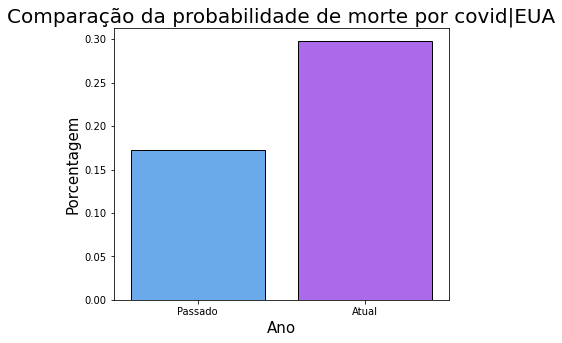

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_morte|us', data = df5, edgecolor='black',palette = 'cool')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de morte por covid|EUA', fontsize = 20)

## Resolução terceira parte (Italia)

In [ ]:
dados2022

,country,morte,infectados,pop
0,Brazil,664361,30558530,214549952
1,Canada,39816,3805890,38491976
2,Italy,164417,16767773,60605772
3,US,997503,81858744,335028178




- h)P(mortecovid e ser Italiano)

In [ ]:
it = dados2022[dados2022['country']== 'Italy']
it_morte = it['morte']

In [ ]:
p_morte_e_it = round(float(it_morte / pop_total_atual)*100,3)
p_morte_e_it

0.025

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto e italiano é de 0.025%

- i)P(mortecovid | ser Italiano)

In [ ]:
it_pop = it['pop']

In [ ]:
p_morte_it = round(float(it_morte/it_pop)*100,3)
p_morte_it

0.271

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto sendo italiano é de aproximadamente 0.3%

- j)Compare estes resultados com o mesmo período do ano passado.

### Obtendo os dados do ano passado 

- h)P(mortecovid e ser Italiano)

In [ ]:
dados2021

,country,morte,infectados,pop
0,Brazil,419633,15096714,213000000
1,Canada,25388,1283179,37966429
2,Italy,122470,4092747,60548678
3,US,576747,32759388,332524270


In [ ]:
it = dados2021[dados2021['country']== 'Italy']
it_morte = it['morte']

In [ ]:
p_morte_e_it_2021 = round(float(it_morte / pop_total_passado)*100,3)
p_morte_e_it_2021

0.019

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto e italiano no ano passado é de 0.019%

- i)P(mortecovid | ser Italiano)

In [ ]:
it_pop = it['pop']

In [ ]:
p_morte_it_2021 = round(float(it_morte/it_pop)*100,3)
p_morte_it_2021

0.202

-- Com base nessa analise podemos afirmar que a probabilidade de ser morto sendo italiano é de 0.2%

### Gerando a comparação

In [ ]:
colunas = {
           'p_morte_e_it' : [p_morte_e_it_2021,p_morte_e_it], 
           'p_morte|it':[p_morte_it_2021,p_morte_it],
           'ano' : ['Passado', 'Atual']
           }

In [ ]:
df6 = pd.DataFrame(colunas)

In [ ]:
df6

,p_morte_e_it,p_morte|it,ano
0,0.019,0.202,Passado
1,0.025,0.271,Atual


Text(0.5, 1.0, 'Comparação da probabilidade de morte por covid e italiano')

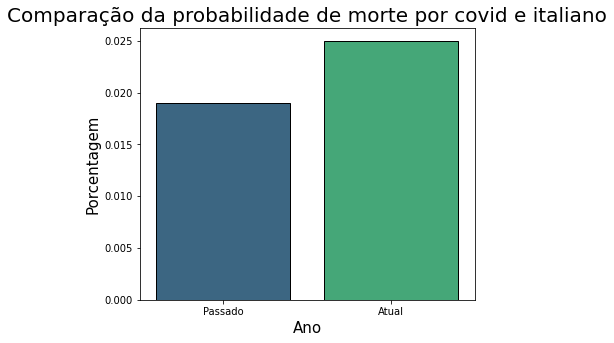

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_morte_e_it', data = df6, edgecolor='black',palette = 'viridis')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de morte por covid e italiano', fontsize = 20)

Text(0.5, 1.0, 'Comparação da probabilidade de morte por covid|italiano')

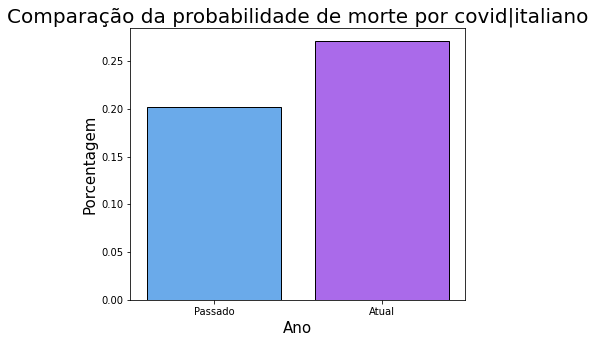

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x= 'ano', y = 'p_morte|it', data = df6, edgecolor='black',palette = 'cool')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Comparação da probabilidade de morte por covid|italiano', fontsize = 20)

# 5 –Gerar uma tabela resumo de todos os resultados. Comente as diferenças.

## Criando a tabela com todos data frame infectados 

In [ ]:
#Atribuindo uma nova coluna chamda países ao nosso data frame 1 (Infectado Brasil)
pais = ['Brasil','Brasil']
df1['países'] = pais

In [ ]:
#Renomeando as colunas do nosso data frame 1 para fazer o pd.concat (necessario as colunas terem o mesmo nome)
df1.rename(columns={'p_infectado_e_br': 'p_infectado_e_',
                    'p_infectado|br': 'p_infectado|'}, inplace = True)

In [ ]:
#Atribuindo uma nova coluna chamda países ao nosso data frame 2 (Infectado Estados Unidos)
pais = ['Estados Unidos','Estados Unidos']
df2['países'] = pais

In [ ]:
#Renomeando as colunas do nosso data frame 2 para fazer o pd.concat (necessario as colunas terem o mesmo nome)
df2.rename(columns={'p_infectado_e_USA': 'p_infectado_e_',
                    'p_infectado|USA': 'p_infectado|'},inplace = True)

In [ ]:
#Atribuindo uma nova coluna chamda países ao nosso data frame 3 (Infectado Italia)
pais = ['Italia','Italia']
df3['países'] = pais

In [ ]:
#Renomeando as colunas do nosso data frame 3 para fazer o pd.concat (necessario as colunas terem o mesmo nome)
df3.rename(columns={'p_infectado_e_Italiano': 'p_infectado_e_',
                    'p_infectado|Italiano': 'p_infectado|'},inplace = True)

In [ ]:
tabela_infectados = pd.concat([df1, df2, df3])

In [ ]:
tabela_infectados.sort_values('ano')

,p_infectado,p_infectado_e_,p_infectado|,ano,países
1,20.456,4.706,14.227,Atual,Brasil
1,NaN,12.594,24.384,Atual,Estados Unidos
1,NaN,2.572,27.526,Atual,Italia
0,8.222,2.321,7.018,Passado,Brasil
0,NaN,5.072,9.823,Passado,Estados Unidos
0,NaN,0.632,6.723,Passado,Italia


## Criando a tabela com todos data frame morte 

In [ ]:
#Atribuindo uma nova coluna chamda países ao nosso data frame 4 (Mortes Brasil)
pais = ['Brasil','Brasil']
df4['países'] = pais

In [ ]:
#Renomeando as colunas do nosso data frame 4 para fazer o pd.concat (necessario as colunas terem o mesmo nome)
df4.rename(columns={'p_morte_e_br': 'p_morte_e_',
                    'p_morte|br': 'p_morte|'}, inplace = True)

In [ ]:
#Atribuindo uma nova coluna chamda países ao nosso data frame 5 (Mortes Estados Unidos)
pais = ['Estados Unidos','Estados Unidos']
df5['países'] = pais

In [ ]:
#Renomeando as colunas do nosso data frame 5 para fazer o pd.concat (necessario as colunas terem o mesmo nome)
df5.rename(columns={'p_morte_e_us': 'p_morte_e_',
                    'p_morte|us': 'p_morte|'}, inplace = True)

In [ ]:
#Atribuindo uma nova coluna chamda países ao nosso data frame 6 (Mortes Italia)
pais = ['Italia','Italia']
df6['países'] = pais

In [ ]:
#Renomeando as colunas do nosso data frame 5 para fazer o pd.concat (necessario as colunas terem o mesmo nome)
df6.rename(columns={'p_morte_e_it': 'p_morte_e_',
                    'p_morte|it': 'p_morte|'}, inplace = True)

In [ ]:
tabela_mortes = pd.concat([df4, df5, df6])

In [ ]:
tabela_mortes.sort_values('ano')

,p_morte,p_morte_e_,p_morte|,ano,países
1,0.288,0.102,0.310,Atual,Brasil
1,NaN,0.154,0.298,Atual,Estados Unidos
1,NaN,0.025,0.271,Atual,Italia
0,0.177,0.064,0.195,Passado,Brasil
0,NaN,0.089,0.173,Passado,Estados Unidos
0,NaN,0.019,0.201,Passado,Italia


## Juntando as duas tabelas (Comentando as diferenças)

In [ ]:
tabela_mortes

,p_morte,p_morte_e_,p_morte|,ano,países
0,0.177,0.064,0.195,Passado,Brasil
1,0.288,0.102,0.310,Atual,Brasil
0,NaN,0.089,0.173,Passado,Estados Unidos
1,NaN,0.154,0.298,Atual,Estados Unidos
0,NaN,0.019,0.201,Passado,Italia
1,NaN,0.025,0.271,Atual,Italia


In [ ]:
tabela_infectados

,p_infectado,p_infectado_e_,p_infectado|,ano,países
0,8.222,2.321,7.018,Passado,Brasil
1,20.456,4.706,14.227,Atual,Brasil
0,NaN,5.072,9.823,Passado,Estados Unidos
1,NaN,12.594,24.384,Atual,Estados Unidos
0,NaN,0.632,6.723,Passado,Italia
1,NaN,2.572,27.526,Atual,Italia


In [ ]:
#Juntando os dois data frame (infectaods e mortes)
tabela = pd.merge(tabela_infectados, tabela_mortes, 
                       on = ['ano','países'], 
                       how = 'inner')

In [ ]:
#Apenas organizando de maneira mais didatica a tabela
tabela = tabela[['ano','países','p_infectado','p_morte','p_infectado_e_','p_morte_e_','p_infectado|','p_morte|']].sort_values('ano')

In [ ]:
#Os valores da nossa tabela estão em porcentagem ou seja multiplicado por cem, assim facilitando a nossa vizualização 
tabela

,ano,países,p_infectado,p_morte,p_infectado_e_,p_morte_e_,p_infectado|,p_morte|
1,Atual,Brasil,20.456,0.288,4.706,0.102,14.227,0.310
3,Atual,Estados Unidos,NaN,NaN,12.594,0.154,24.384,0.298
5,Atual,Italia,NaN,NaN,2.572,0.025,27.526,0.271
0,Passado,Brasil,8.222,0.177,2.321,0.064,7.018,0.195
2,Passado,Estados Unidos,NaN,NaN,5.072,0.089,9.823,0.173
4,Passado,Italia,NaN,NaN,0.632,0.019,6.723,0.201


- Com base nos dados que geramos é possivel se obter diversas analises, observe que de maneira geral as probabilidas do ano atual geralmente estão em porcentagens maiores, isso se da por conta do nosso data set inicial ou seja de onde obtemos os dados, ser organizado de maneira em que se ocorre a soma dos infectados e mortos, sendo uma soma geral des do começo da pandemia. Logo quanto mais o tempo passa maiores ficam estes valores, assim gerando maiores porcentagens.

**Obersevações:

As colunas p_infectado e p_morte são colunas que foram calculadas com os valores totais, não apenas do Brasil.

- Podemos observar alguns fatos :

A Italia de maneira geral é o país em que se tem a maior probabilidade de ser infectado, e logo depois os Eua.

No Brasil é onde se temos a maior probabilidade de morte, tendo isso como base podemos tirar algumas conclusões como por exemplo: por conta do Brasil ser um país subdesenvolvido e emergente, os serviços de saúde são de menor efetividade quando comparado com os outros países da nossa tabela.

Na Italia temos as menores porcentagens de morte, levando a nossa analise anterior em consideração podemos concluir que o serviço de saúde é mais eficaz.


- Estas são apenas analises iniciais, podemos tirar muitas conclusões de acordo com a probabilidade mas devemos tomar cuidado pois são diversos os fatores que influenciam esses valores...

## Gerando graficos (Vamos apenas trabalhar com as datas atuais)

In [ ]:
tabela_mortes_atual = tabela_mortes[tabela_mortes['ano'] == 'Atual' ]
tabela_mortes_atual.drop(columns=['p_morte'],inplace = True)

Text(0.5, 1.0, 'Grafico probabilidade de morte por covid no ano atual')

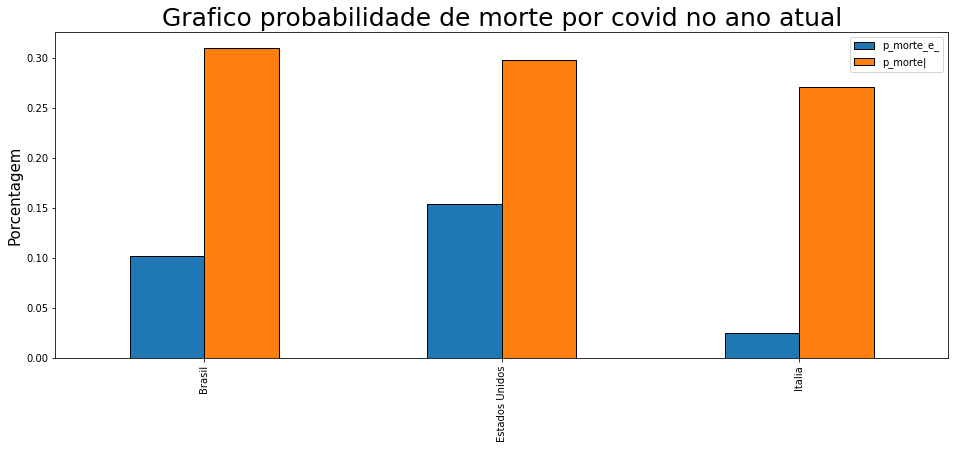

In [ ]:
tabela_mortes_atual.plot(x='países', 
        kind='bar', 
        stacked=False, 
        edgecolor='black',
        figsize=(16, 6)) 
plt.xlabel('')
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Grafico probabilidade de morte por covid no ano atual', fontsize = 25)

In [ ]:
tabela_infectados_atual = tabela_infectados[tabela_infectados['ano'] == 'Atual' ]
tabela_infectados_atual.drop(columns=['p_infectado'],inplace = True)

Text(0.5, 1.0, 'Grafico probabilidade de infectado por covid no ano atual')

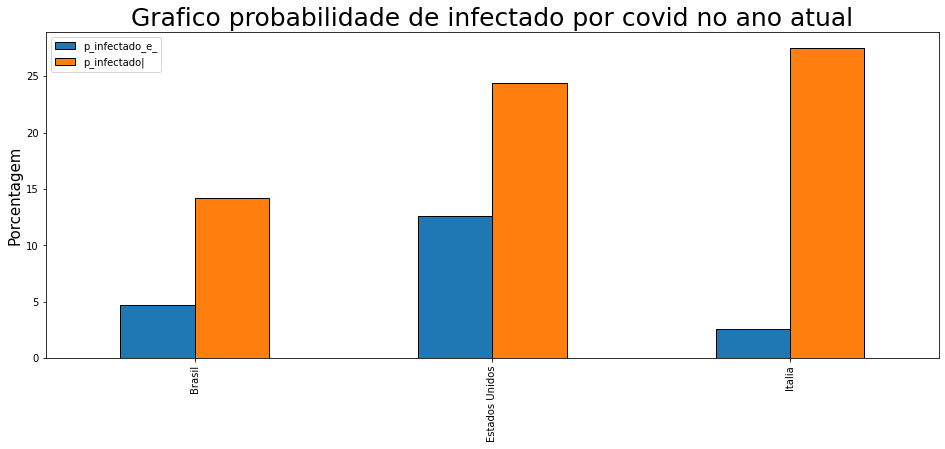

In [ ]:
tabela_infectados_atual.plot(x='países', 
        kind='bar', 
        stacked=False, 
        edgecolor='black',
        figsize=(16, 6)) 
plt.xlabel('')
plt.ylabel('Porcentagem', fontsize = 15)
plt.title('Grafico probabilidade de infectado por covid no ano atual', fontsize = 25)